In [202]:
import cv2
from utils import show_images
import math
import numpy as np
from skimage.draw import line

%load_ext autoreload
%autoreload 2
%matplotlib inline
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


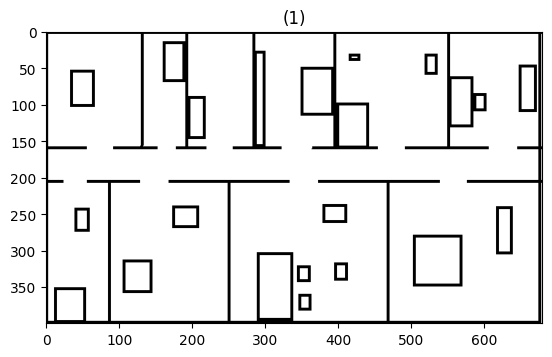

In [203]:
# Read Map
img = cv2.imread("./map.jpeg", cv2.IMREAD_COLOR)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Convert to binary
threshold_value = 128
_, map = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), threshold_value, 1, cv2.THRESH_BINARY)

show_images([map])


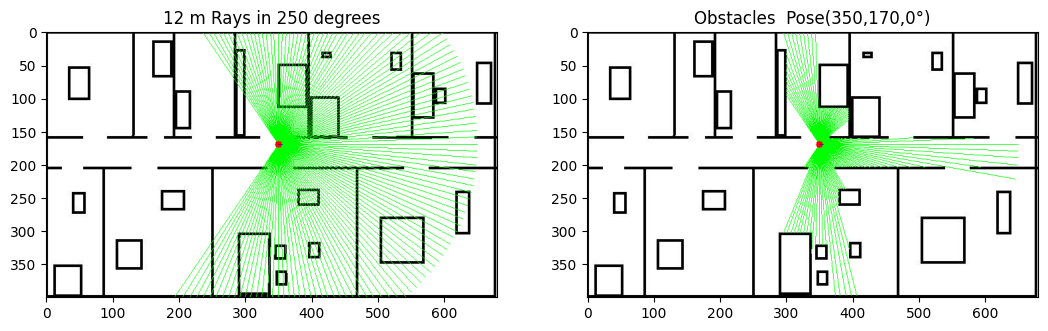

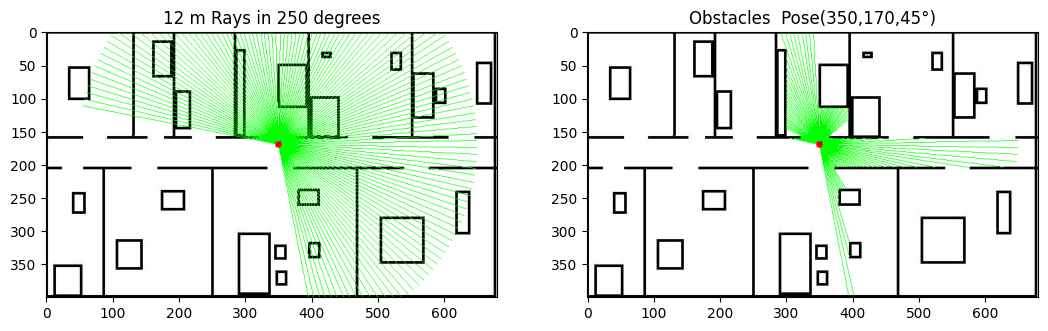

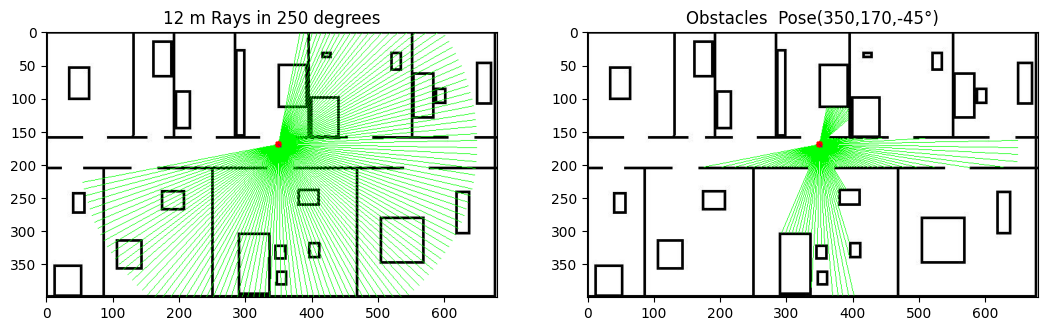

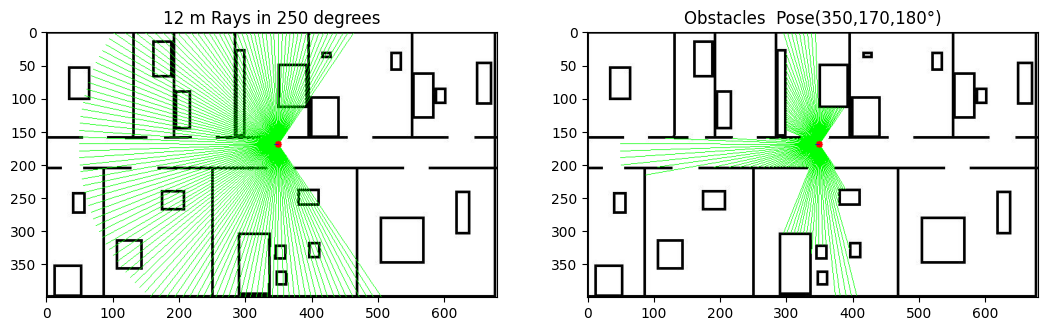

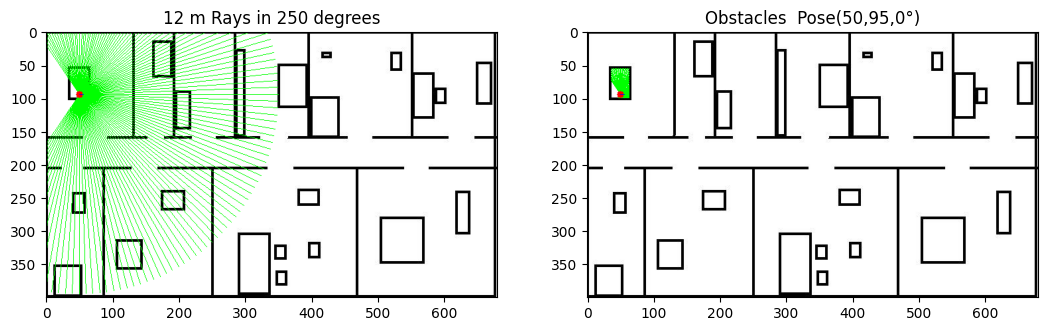

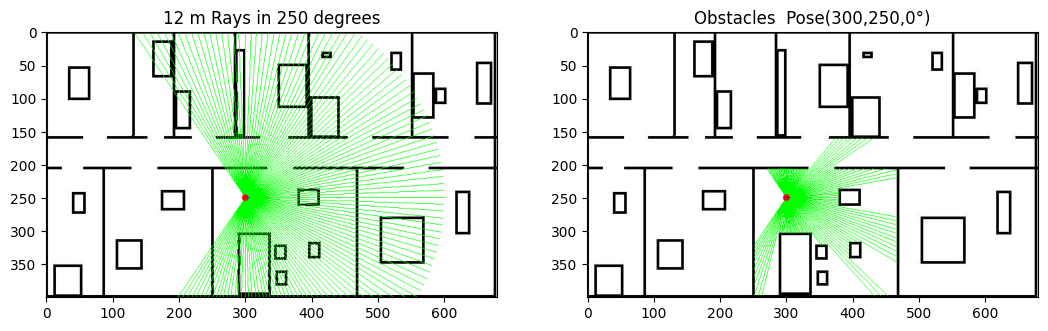

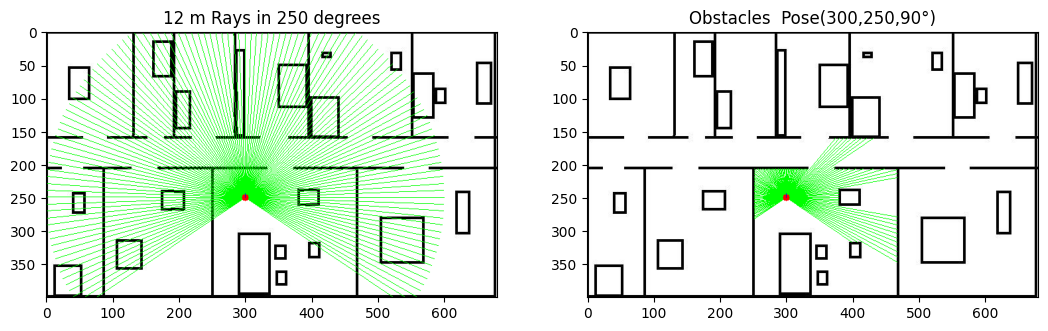

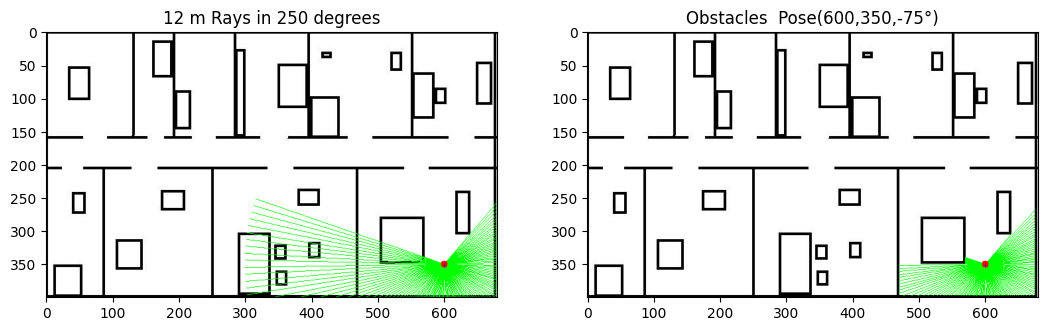

In [321]:
def laser_range(initial_pose):
    H,W=map.shape

    # Robot initial Pose
    x=initial_pose[0] # pixel 400
    y=initial_pose[1]  # pixel 170
    theta=initial_pose[2]
    theta_rad = math.radians(-1*theta)

    # Ray
    max_range=1200 #12m =1200 cm
    ray_angle=2



    full_range_ray_map=img.copy()

    max_range_ray_map=full_range_ray_map.copy()

    # Go 125 Degrees right and left on ray_angle=2 degrees at each step
    for i in range(0,125,ray_angle):
    # for i in range(0,1,2):
        # print("i",i)

        # Right
        new_theta_rad = math.radians(-1*theta+i)
        # Calculate the new x and y coordinates
        max_x = (int)(x*4 + max_range * math.cos(new_theta_rad))//4
        max_y = (int)(y*4 + max_range * math.sin(new_theta_rad))//4

        # Draw Full Range Ray
        cv2.line(full_range_ray_map, (x, y), (max_x, max_y), (0,255,0), 1)

        # Get Ray Points
        points_x,points_y=line( x, y, max_x, max_y)

        # Drop those out of the Map Boundaries
        valid_indices = np.where((points_x < W)&(points_x >= 0) & (points_y < H)&(points_y >= 0))[0]
        points_x=points_x[valid_indices]
        points_y=points_y[valid_indices]

        # Get Obstacles
        first_obstacle_index=np.where(map[points_y,points_x] == 0)[0]
        if(len(first_obstacle_index)>0):
            first_obstacle_index=first_obstacle_index[0] #first zero Pixel
            first_obstacle=(points_x[first_obstacle_index],points_y[first_obstacle_index])
        else:
            # Not obstacle but max_range ray :D
            first_obstacle=(max_x,max_y) 
            
        # Draw Ray Till First Obstacle
        cv2.line(max_range_ray_map, (x, y), first_obstacle, (0,255,0), 1)
        

        # Left
        new_theta_rad = math.radians(-1*theta-i)
        # Calculate the new x and y coordinates
        max_x = (int)(x*4 + max_range * math.cos(new_theta_rad))//4
        max_y = (int)(y*4 + max_range * math.sin(new_theta_rad))//4

        # Draw Full Range Ray
        cv2.line(full_range_ray_map, (x, y), (max_x, max_y), (0,255,0), 1)

        # Get Ray Points
        points_x,points_y=line( x, y, max_x, max_y)
        
        # Drop those out of the Map Boundaries
        valid_indices = np.where((points_x < W)&(points_x >= 0) & (points_y < H)&(points_y >= 0))[0]
        points_x=points_x[valid_indices]
        points_y=points_y[valid_indices]

        # Get Obstacles
        first_obstacle_index=np.where(map[points_y,points_x] == 0)[0]
        if(len(first_obstacle_index)>0):
            first_obstacle_index=first_obstacle_index[0] #first zero Pixel
            first_obstacle=(points_x[first_obstacle_index],points_y[first_obstacle_index])
        else:
            # Not obstacle but max_range ray :D
            first_obstacle=(max_x,max_y) 
        
        # Draw Ray Till First Obstacle
        cv2.line(max_range_ray_map, (x, y), first_obstacle, (0,255,0), 1)


    # Draw Robot Pose (x,y)
    cv2.circle(full_range_ray_map, (x,y), 5, (255, 0, 0), thickness=-1) # r=4 bec cell is 4*4
    cv2.circle(max_range_ray_map, (x,y), 5, (255, 0, 0), thickness=-1) # r=4 bec cell is 4*4

    # Draw theta
    pose_orientation_x = (int)(x + 6 * math.cos(theta_rad))
    pose_orientation_y = (int)(y + 6 * math.sin(theta_rad))
    cv2.line(full_range_ray_map, (x, y), (pose_orientation_x, pose_orientation_y), (0,0,255), 1)
    cv2.line(max_range_ray_map, (x, y), (pose_orientation_x, pose_orientation_y), (0,0,255), 1)


    show_images([full_range_ray_map,max_range_ray_map],['12 m Rays in 250 degrees','Obstacles  Pose('+str(x)+','+str(y)+','+str(theta)+'°)'])


laser_range((350,170,0))
laser_range((350,170,45))
laser_range((350,170,-45))
laser_range((350,170,180))
laser_range((50,95,0))
laser_range((300,250,0))
laser_range((300,250,90))
laser_range((600,350,-75))
